In [1]:
#Imports
import numpy as np 
from NNetwork import NNetwork as nn
import networkx as nx
#import utils.NNetwork as nn
import utils.ndl as ndl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from helper_functions.helper_functions import display_graphs, display_dict_and_graph, display_graphs_dict_graph, motif_sample_display_list

In [2]:

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})

# Subgraphs induced on uniformly random k-paths

In [19]:
ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
#ntwk_list = ['Caltech36', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'Network_dictionary/test1/'

graph_list = []
for ntwk in ntwk_list:
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    path = "Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))
    

num nodes in G 769
num edges in G 33312
num nodes in G 20467
num edges in G 1495226
num nodes in G 5000
num edges in G 250356
num nodes in G 5000
num edges in G 495000
num nodes in G 5000
num edges in G 250000
num nodes in G 3000
num edges in G 1504900


num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


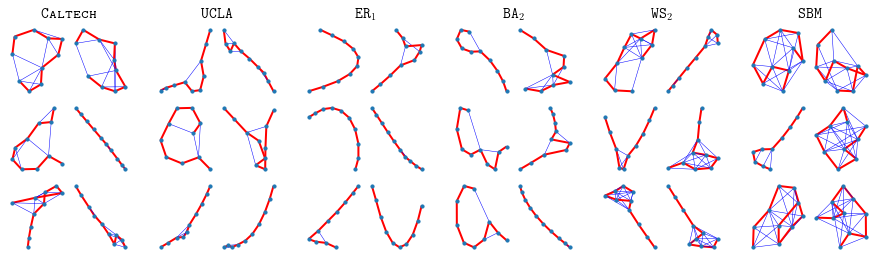

In [30]:
motif_sample_display_list(list_graphs=graph_list, k=10, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


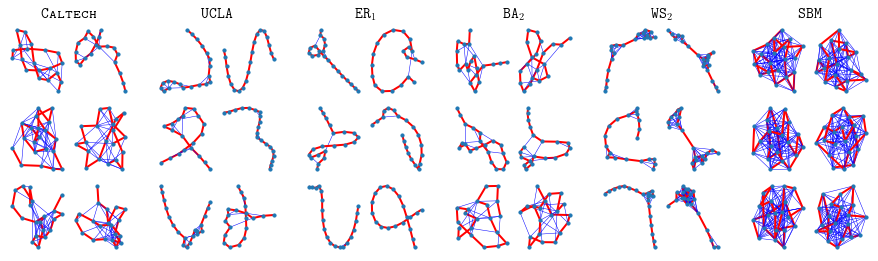

In [26]:
motif_sample_display_list(list_graphs=graph_list, k=20, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex1.pdf',
                          fig_size = [15,4])

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100


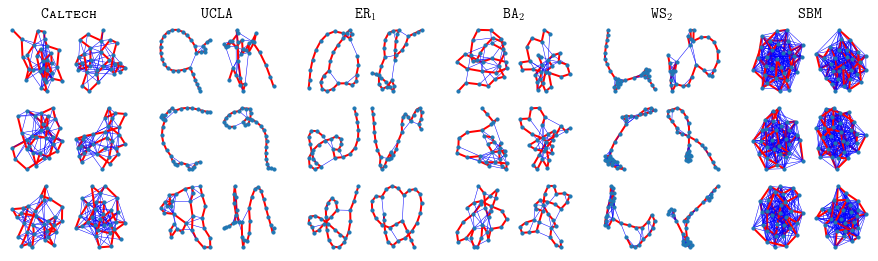

In [31]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

# Plots of latent motifs

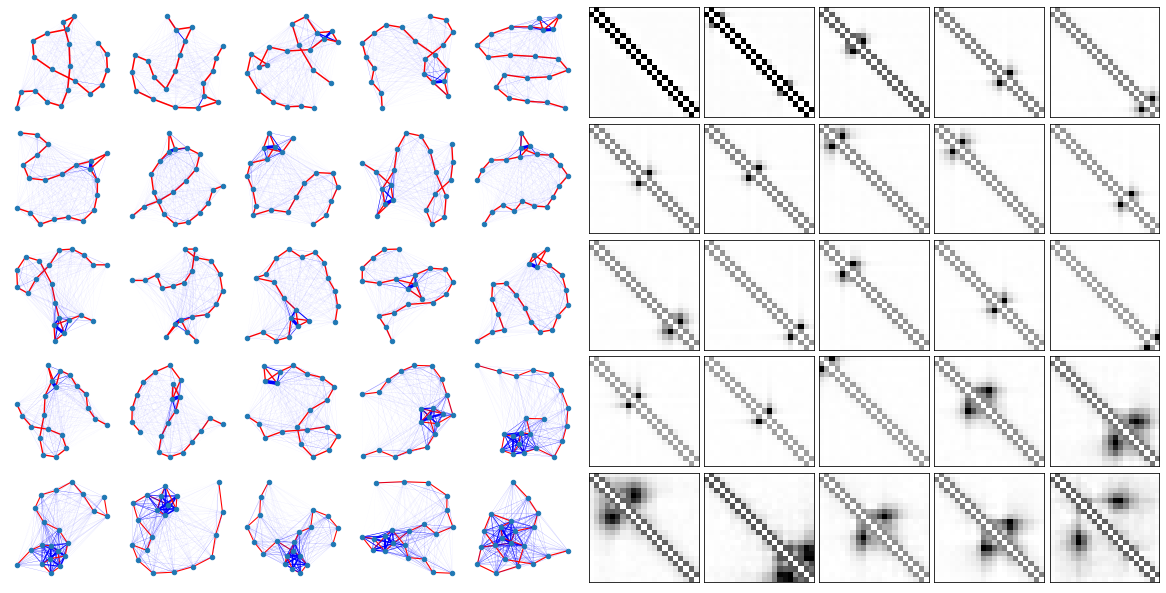

In [10]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_UCLA26_k_21_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=At, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "UCLA_dict_graph.png")

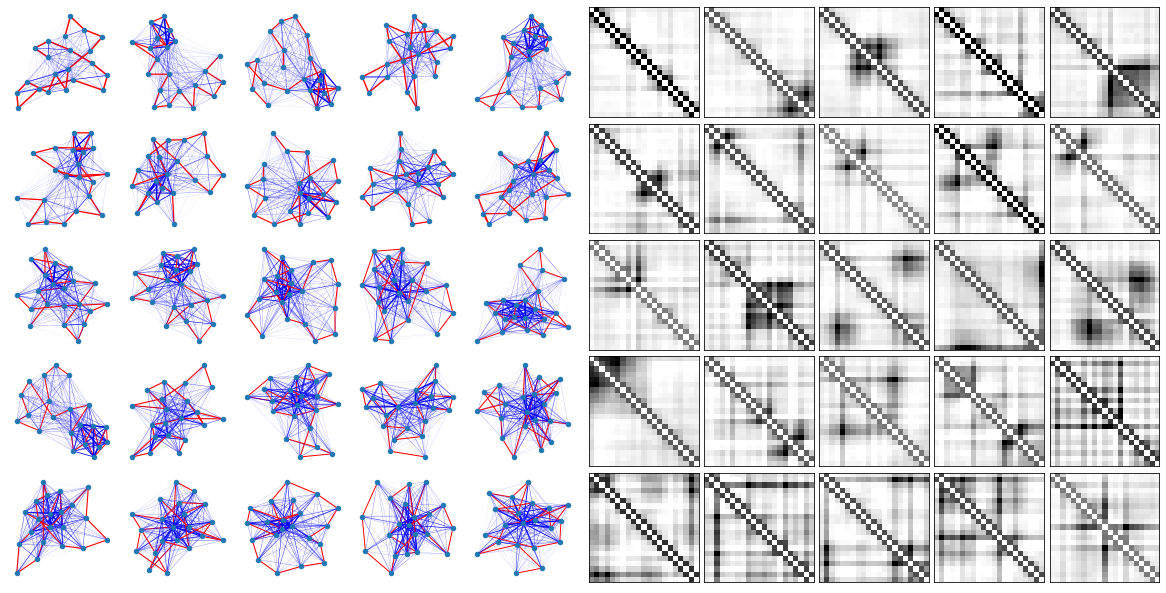

In [12]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_Caltech36_k_21_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=At, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "Caltech_dict_graph.png")

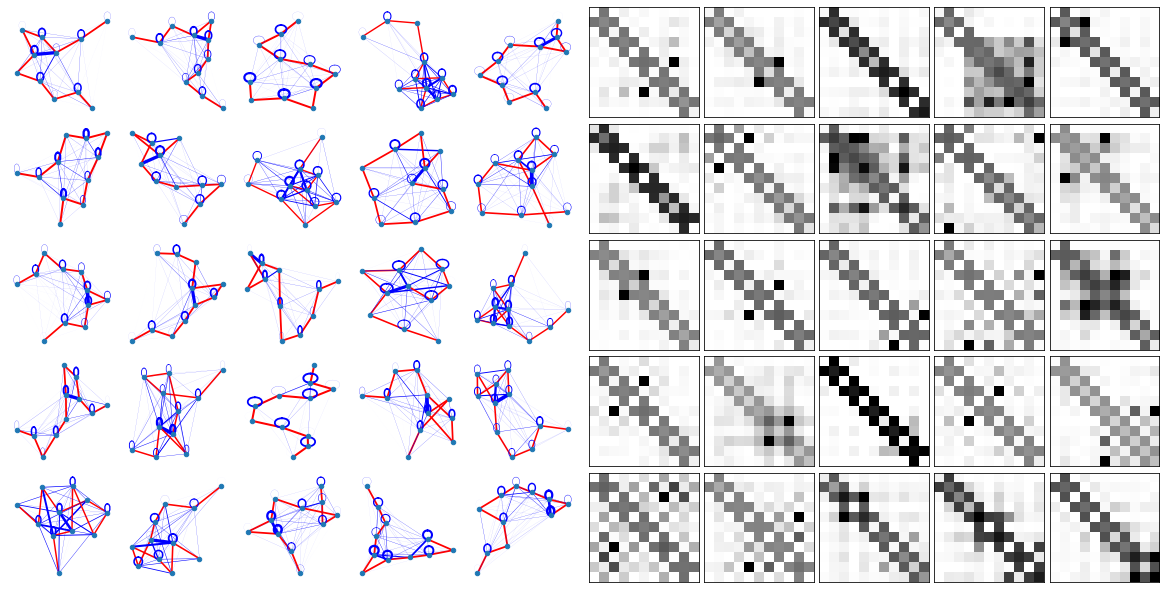

In [16]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_COVID_PPI_k_11_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=None, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "COVID_dict_graph_k11.png")

# Stochastic Block Model

In [34]:
sizes = [1000, 1000, 1000]
probs = [[0.5, 0.001, 0.001], [0.001, 0.5, 0.001], [0.001, 0.001, 0.5]]
G1 = nx.stochastic_block_model(sizes, probs, seed=0)
#nx.draw_networkx(G1)
print('num nodes in G', len(G1.nodes))
print('num edges in G', len(G1.edges))

num nodes in G 3000
num edges in G 752450


In [35]:
path = "Data/test/SBM2.txt"
nx.write_edgelist(G1, path, data=False, delimiter=',')

In [36]:
G = nn.NNetwork()
G.add_edges( list(G1.edges()) )

X0, embs0 = G.get_patches(k=k, sample_size=200, skip_folded_hom=True)

NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=True)
At0 = NDL.At

num of subgraphs induced on k-paths: 200
training dictionaries from patches...
skip_folded_hom= True
W.shape (144, 9)


  0%|                                                   | 0/100 [00:00<?, ?it/s]

homomorphism resampled


 21%|████████▊                                 | 21/100 [00:07<00:29,  2.70it/s]

homomorphism resampled


 41%|█████████████████▏                        | 41/100 [00:14<00:21,  2.71it/s]

homomorphism resampled


 61%|█████████████████████████▌                | 61/100 [00:21<00:13,  2.94it/s]

homomorphism resampled


 81%|██████████████████████████████████        | 81/100 [00:28<00:06,  2.96it/s]

homomorphism resampled


100%|█████████████████████████████████████████| 100/100 [00:35<00:00,  2.83it/s]

!!!number of distinct nodes in homomorhpisms : avg 12.0 std 0.000


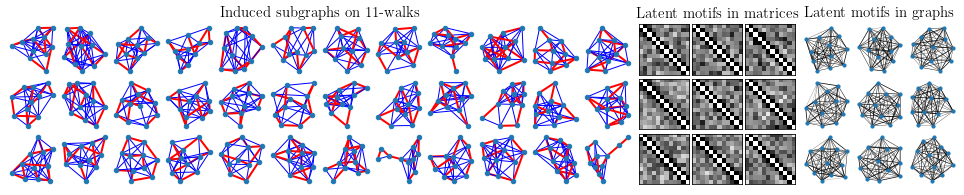

In [37]:
title = "SBM"
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path.pdf"
subtitle = 'Induced subgraphs on {}-walks'.format(k)

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

# Coronavirus PPI subgraphs and latent motifs

In [38]:
sampling_alg = 'pivot'
ntwk = 'COVID_PPI' # COVID_PPI, Wisconsin87, UCLA26, true_edgelist_for_ER_5000_mean_degree_50
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'Network_dictionary/NDL_rev1/'
k=10

path = "Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

#mx0 = G.get_adjacency_matrix(ordered_node_list=G.nodes())
#plt.imshow(mx0)

num nodes in G 1555
num edges in G 4911


In [39]:
G1 = nx.Graph(G.get_edges())
print('edges', len(G1.edges()))

edges 2481


In [40]:
Gc = max(nx.connected_components(G1), key=len)
G_conn = G1.subgraph(Gc)
print('num_nodes in max_comp of G=', len(G_conn.nodes))
print('num_edges in max_comp of G=', len(G_conn.edges))

num_nodes in max_comp of G= 1536
num_edges in max_comp of G= 2463


In [41]:
nx.diameter(G_conn)

9

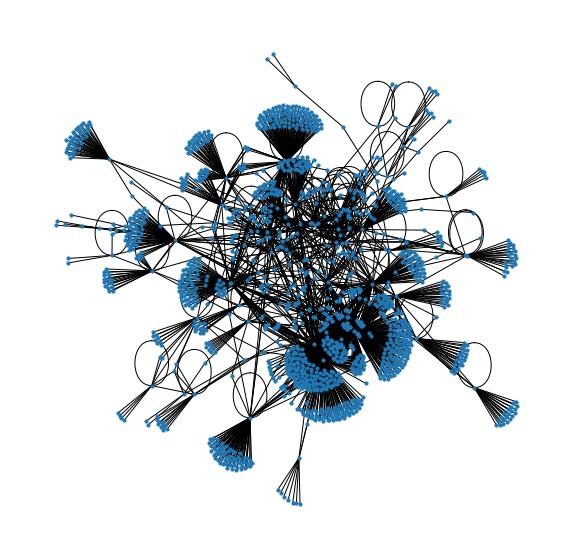

In [46]:
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G_conn)
edges = G_conn.edges()
nx.draw(G_conn, with_labels=False, node_size=10, ax=ax, label='Graph')

In [47]:
X, embs = G.get_patches(k=k, sample_size=100, skip_folded_hom=True)

num of subgraphs induced on k-paths: 100


num of subgraphs induced on k-paths: 100
training dictionaries from patches...
skip_folded_hom= True
W.shape (121, 9)


  1%|▍                                          | 1/100 [00:00<00:56,  1.75it/s]

homomorphism resampled


 21%|████████▊                                 | 21/100 [00:14<00:52,  1.51it/s]

homomorphism resampled


 41%|█████████████████▏                        | 41/100 [00:26<00:37,  1.58it/s]

homomorphism resampled


 61%|█████████████████████████▌                | 61/100 [00:40<00:26,  1.47it/s]

homomorphism resampled


 81%|██████████████████████████████████        | 81/100 [00:53<00:11,  1.60it/s]

homomorphism resampled


100%|█████████████████████████████████████████| 100/100 [01:05<00:00,  1.52it/s]


!!!number of distinct nodes in homomorhpisms : avg 7.92 std 1.254


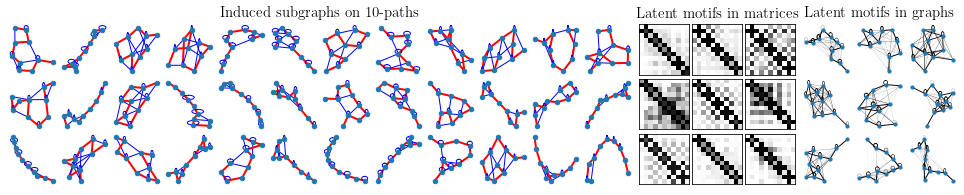

In [48]:
skip_folded_hom = True # k-path sampling

title = str(ntwk_nonumber)
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path0.png"
subtitle = 'Induced subgraphs on {}-paths'.format(k)

# get subgraphs 
X0, embs0 = G.get_patches(k=k, sample_size=100, skip_folded_hom=skip_folded_hom)

# get latent motif 
NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
At0 = NDL.At

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

training dictionaries from patches...
skip_folded_hom= False
W.shape (121, 9)


  1%|▍                                          | 1/100 [00:00<00:17,  5.75it/s]

homomorphism resampled


 21%|████████▊                                 | 21/100 [00:04<00:15,  5.15it/s]

homomorphism resampled


 41%|█████████████████▏                        | 41/100 [00:08<00:12,  4.62it/s]

homomorphism resampled


 61%|█████████████████████████▌                | 61/100 [00:12<00:07,  5.17it/s]

homomorphism resampled


 81%|██████████████████████████████████        | 81/100 [00:16<00:04,  4.58it/s]

homomorphism resampled


100%|█████████████████████████████████████████| 100/100 [00:20<00:00,  4.79it/s]


!!!number of distinct nodes in homomorhpisms : avg 7.77 std 1.224


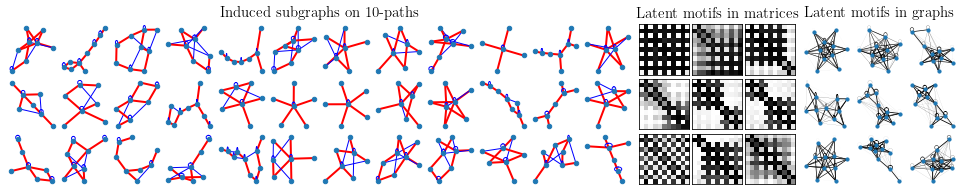

In [49]:
skip_folded_hom = False # k-walk sampling

title = str(ntwk_nonumber)
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path0.png"
subtitle = 'Induced subgraphs on {}-paths'.format(k)

# get subgraphs 
X0, embs0 = G.get_patches(k=k, sample_size=100, skip_folded_hom=skip_folded_hom)

# get latent motif 
NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
At0 = NDL.At

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

ntwk_nonumber true_edgelist_for_ER__mean_degree_
num nodes in G 5000
num edges in G 250356
training dictionaries from patches...
skip_folded_hom= False
W.shape (441, 12)


  0%|                                                   | 0/100 [00:00<?, ?it/s]

homomorphism resampled


 21%|████████▊                                 | 21/100 [00:09<00:38,  2.07it/s]

homomorphism resampled


 41%|█████████████████▏                        | 41/100 [00:18<00:23,  2.48it/s]

homomorphism resampled


 61%|█████████████████████████▌                | 61/100 [00:26<00:16,  2.37it/s]

homomorphism resampled


 81%|██████████████████████████████████        | 81/100 [00:35<00:08,  2.32it/s]

homomorphism resampled


100%|█████████████████████████████████████████| 100/100 [00:42<00:00,  2.33it/s]


!!!number of distinct nodes in homomorhpisms : avg 20.65 std 0.517
num of subgraphs induced on k-paths: 200
training dictionaries from patches...
skip_folded_hom= True
W.shape (441, 12)


  0%|                                                   | 0/100 [00:00<?, ?it/s]

homomorphism resampled


 21%|████████▊                                 | 21/100 [00:10<00:40,  1.93it/s]

homomorphism resampled


 41%|█████████████████▏                        | 41/100 [00:20<00:29,  2.00it/s]

homomorphism resampled


 61%|█████████████████████████▌                | 61/100 [00:32<00:20,  1.88it/s]

homomorphism resampled


 80%|█████████████████████████████████▌        | 80/100 [00:42<00:10,  1.89it/s]

homomorphism resampled


100%|█████████████████████████████████████████| 100/100 [00:52<00:00,  1.91it/s]


!!!number of distinct nodes in homomorhpisms : avg 21.0 std 0.000


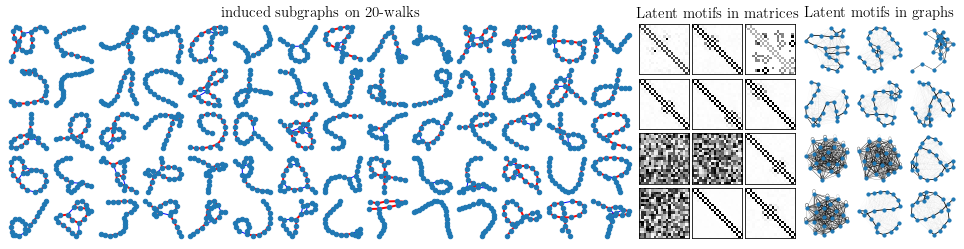

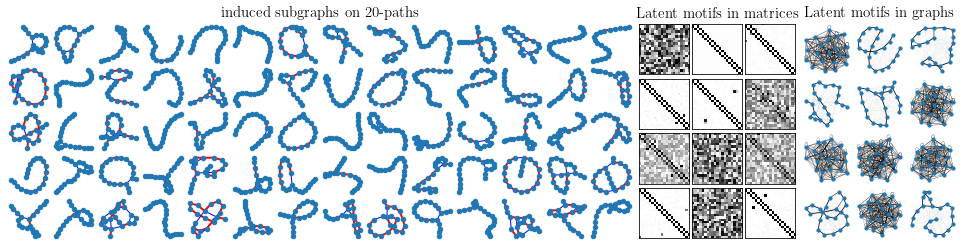

In [53]:
list_network_files = [#'Caltech36.txt',
                      #'MIT8.txt',
                      #'UCLA26.txt',
                      #'Harvard1.txt',
                      #'COVID_PPI.txt',
                      #'facebook_combined.txt',
                      #'arxiv.txt',
                      #'node2vec_homosapiens_PPI.txt',
                      'true_edgelist_for_ER_5000_mean_degree_50.txt',
                      #'true_edgelist_for_ER_5000_mean_degree_100.txt',
                      #'true_edgelist_for_SW_5000_k_50_p_0.05.txt',
                      #'true_edgelist_for_SW_5000_k_50_p_0.1.txt',
                      #'true_edgelist_for_BA_5000_m_25.txt',
                      #'true_edgelist_for_BA_5000_m_50.txt',
                      ]

for ntwk in list_network_files:
    sampling_alg = 'pivot'
    #ntwk = 'true_edgelist_for_ER_5000_mean_degree_100' # COVID_PPI, Wisconsin87, UCLA26
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    ntwk_nonumber = ntwk_nonumber.replace('.txt',"")
    print('ntwk_nonumber', ntwk_nonumber)
    save_folder = 'Network_dictionary/NDL_rev1/'

    path = "Data/Networks_all_NDL/" + str(ntwk) 
    
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))

    #mx0 = G.get_adjacency_matrix(ordered_node_list=G.nodes())
    #plt.imshow(mx0)


    ######################

    skip_folded_hom = False
    k = 20

    X0, embs0 = G.get_patches(k=k, sample_size=200, skip_folded_hom=skip_folded_hom)

    NDL = ndl.Network_Reconstructor(G,
                                     n_components=12,
                                     MCMC_iterations=100,
                                     sub_iterations=100,
                                     sample_size=100,
                                     batch_size=10,
                                     k1=0,
                                     k2=k,
                                     sampling_alg='pivot',
                                     if_wtd_network=False)

    W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
    At0 = NDL.At

    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_walk.png"
    subtitle = 'induced subgraphs on {}-walks'.format(k)

    data = [X0, embs0, W0, At0]
    display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                                 title=title,
                                 subtitle = subtitle,
                                 save_path=save_path,
                                 grid_shape_subg=[5,14],
                                 grid_shape_dict=[4,3],
                                 width_ratios=[4,1,1],
                                 fig_size=[16.5,4],
                                 show_importance=False)



    ######################

    skip_folded_hom = True

    X1, embs1 = G.get_patches(k=k, sample_size=200, skip_folded_hom=skip_folded_hom)

    NDL1 = ndl.Network_Reconstructor(G,
                                     n_components=12,
                                     MCMC_iterations=100,
                                     sub_iterations=100,
                                     sample_size=100,
                                     batch_size=10,
                                     k1=0,
                                     k2=k,
                                     sampling_alg='pivot',
                                     if_wtd_network=False)

    W1 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
    At1 = NDL1.At


    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path.png"
    subtitle = 'induced subgraphs on {}-paths'.format(k)

    data = [X1, embs1, W1, At1]
    display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                                 title=title,
                                 subtitle = subtitle,
                                 save_path=save_path,
                                 grid_shape_subg=[5,14],
                                 grid_shape_dict=[4,3],
                                 width_ratios=[4,1,1],
                                 fig_size=[16.5,4],
                                 show_importance=False)
                      

# Read off saved dictionary files and display

In [54]:
from os import listdir
from os.path import isfile, join

In [55]:
mypath = "Network_dictionary/NDL_inj_dictionary_k_all1"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
path = mypath + "/" + onlyfiles[0]
result_dict = np.load(path, allow_pickle=True).item()

ntwk_nonpy full_result_true_edgelist_for_ER_5000_mean_degree_100_k_21_r_9
ntwk_nonpy full_result_arxiv_k_21_r_100
ntwk_nonpy full_result_SBM1_k_21_r_100
ntwk_nonpy full_result_true_edgelist_for_ER_5000_mean_degree_50_k_21_r_36
ntwk_nonpy full_result_Harvard1_k_51_r_25
ntwk_nonpy full_result_true_edgelist_for_BA_5000_m_25_k_21_r_9
ntwk_nonpy full_result_true_edgelist_for_SW_5000_k_50_p_005_k_6_r_25
ntwk_nonpy full_result_true_edgelist_for_BA_5000_m_25_k_21_r_36
ntwk_nonpy full_result_true_edgelist_for_SW_5000_k_50_p_01_k_21_r_64
ntwk_nonpy full_result_SBM_k_6_r_25


UnpicklingError: Failed to interpret file 'Network_dictionary/NDL_inj_dictionary_k_all1/all_dictionaries_rank_4.png' as a pickle

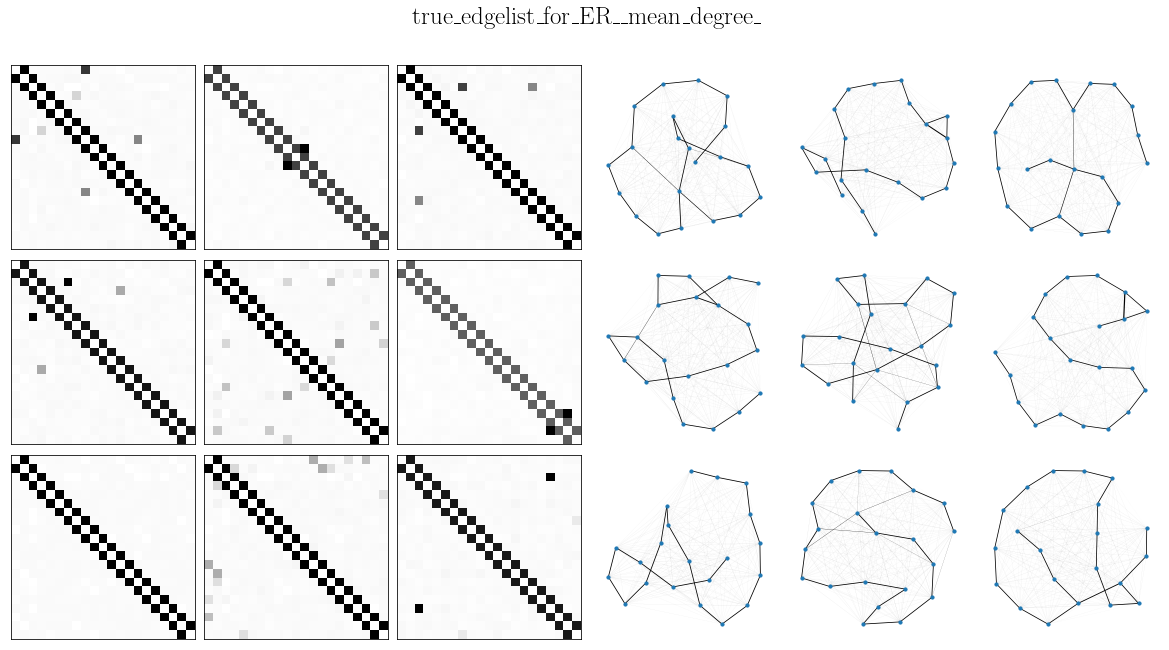

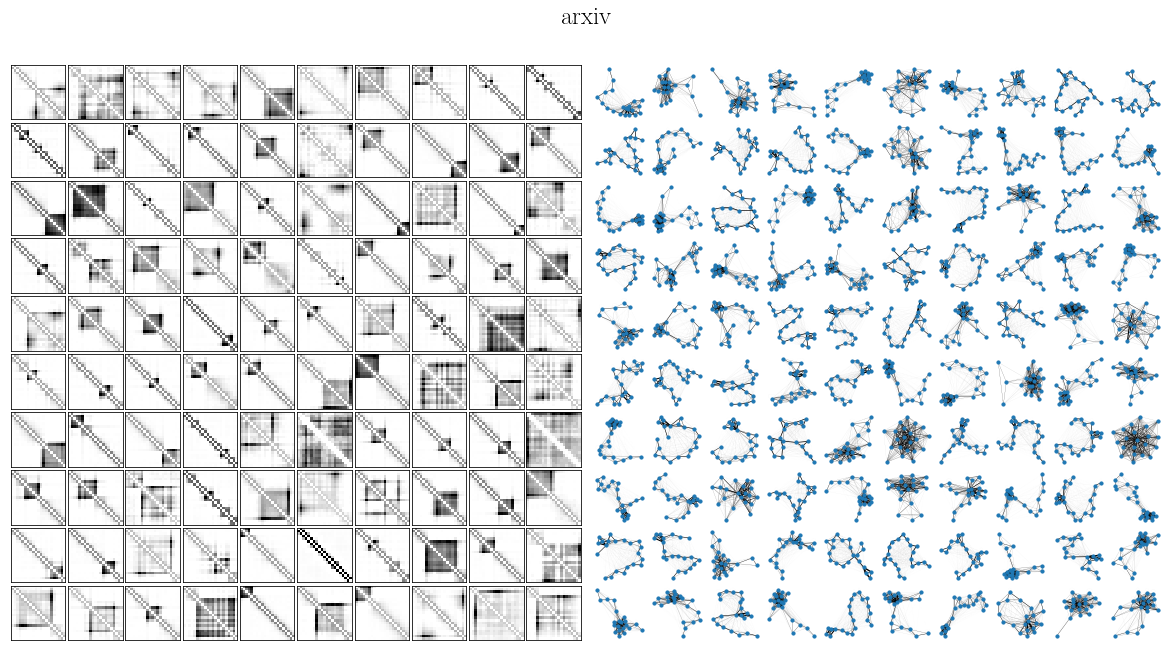

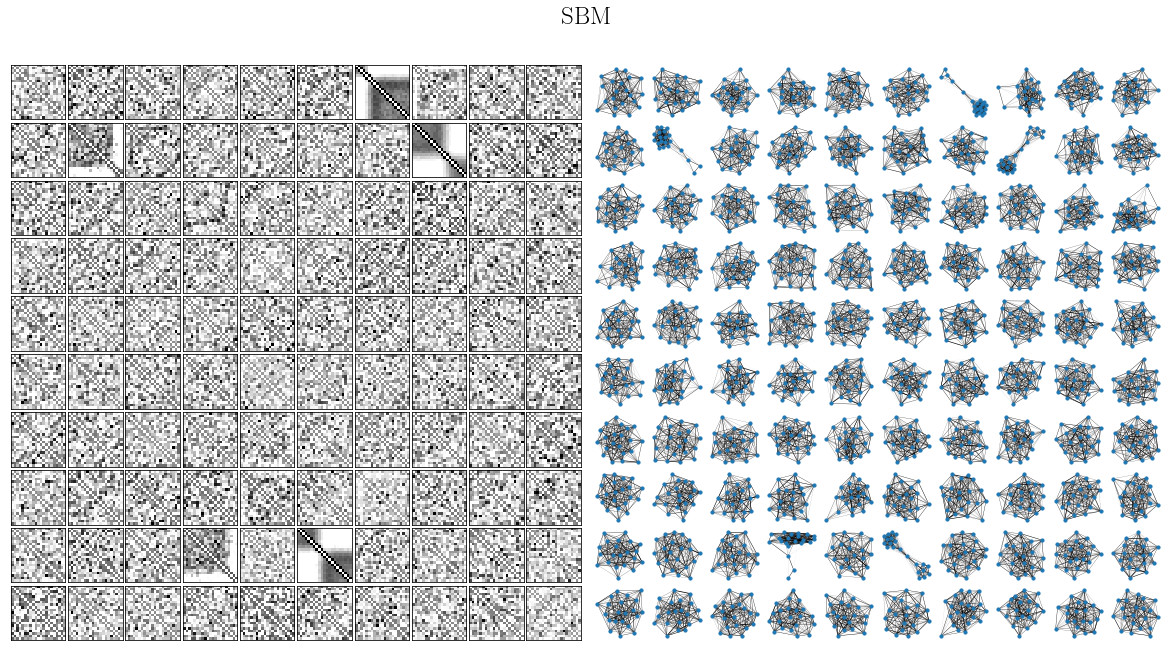

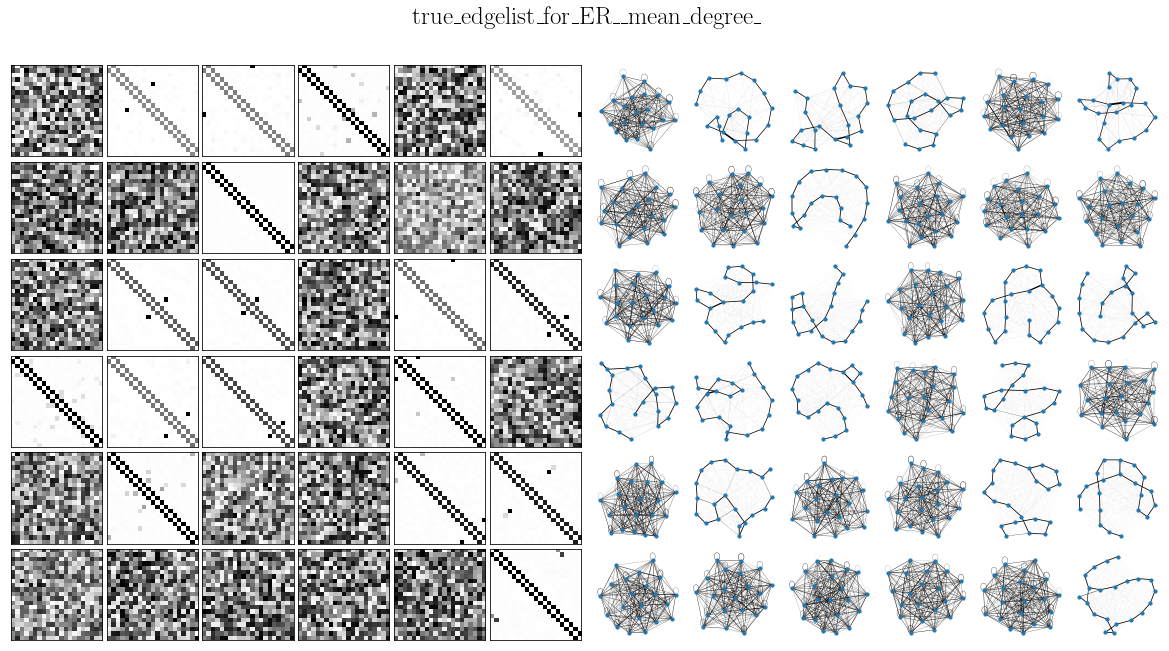

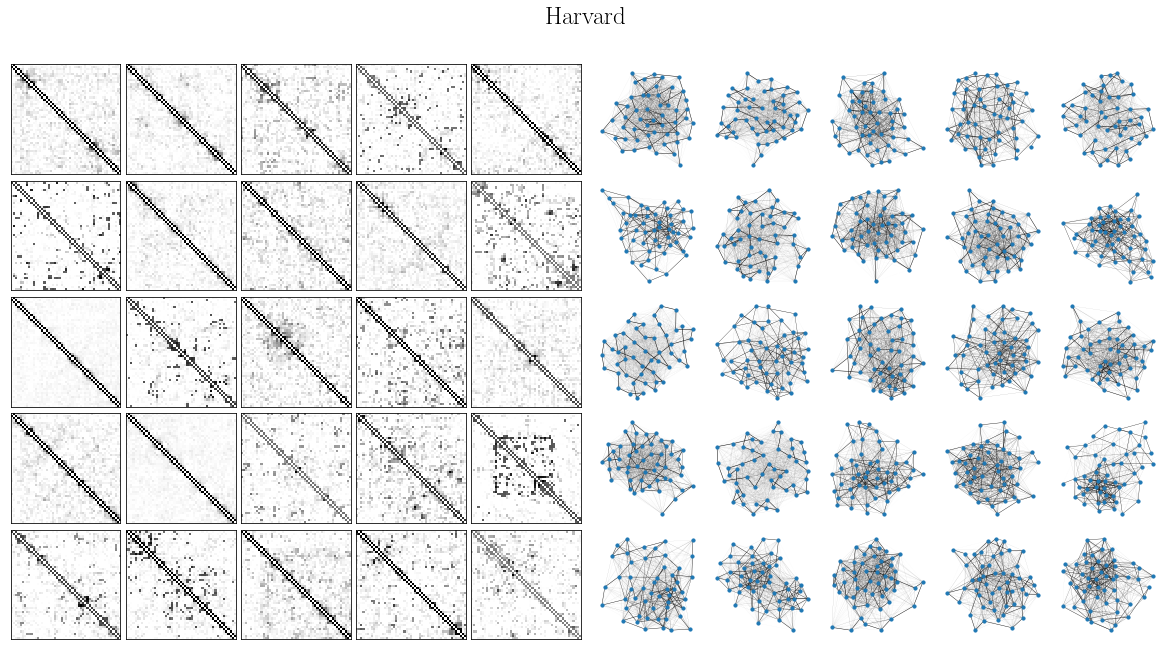

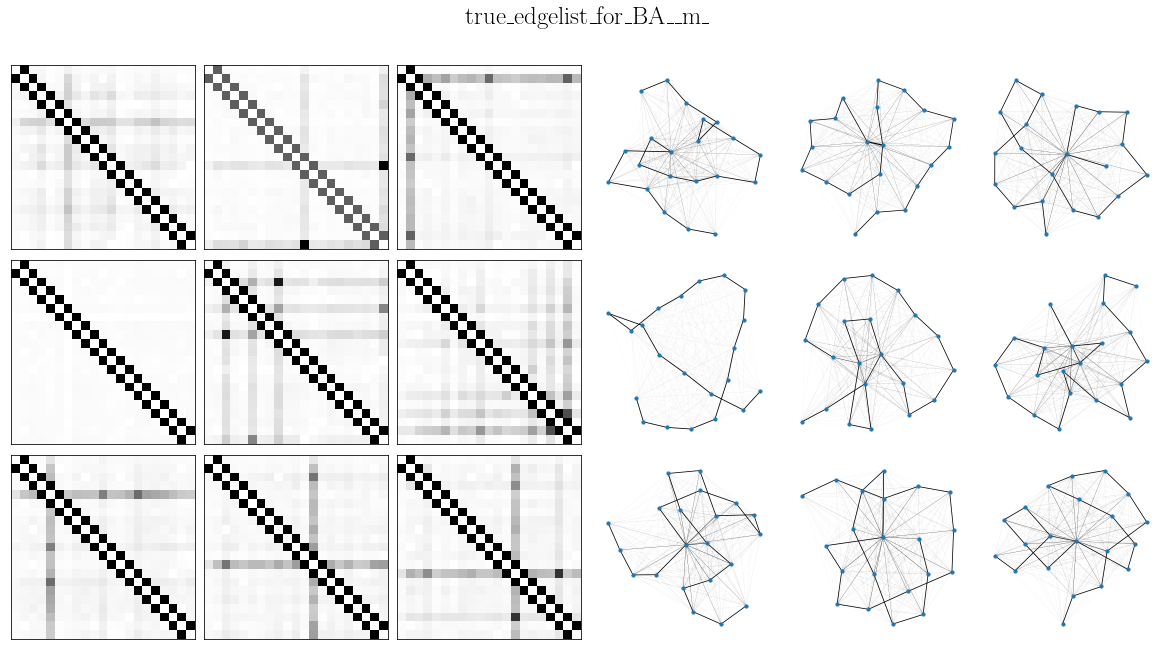

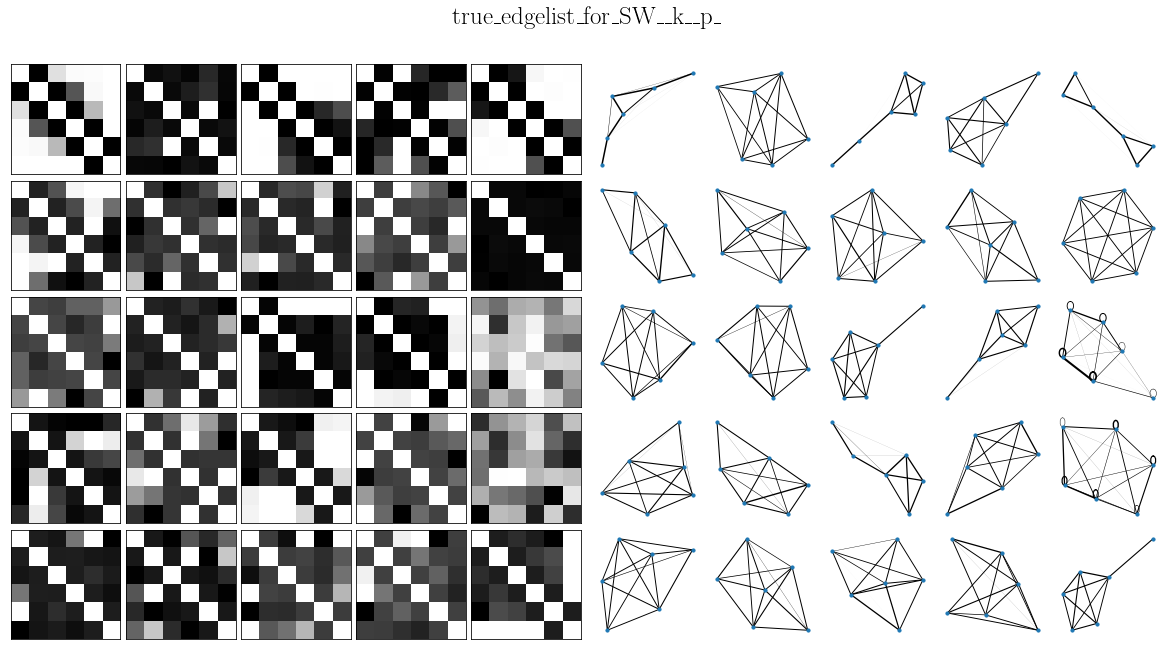

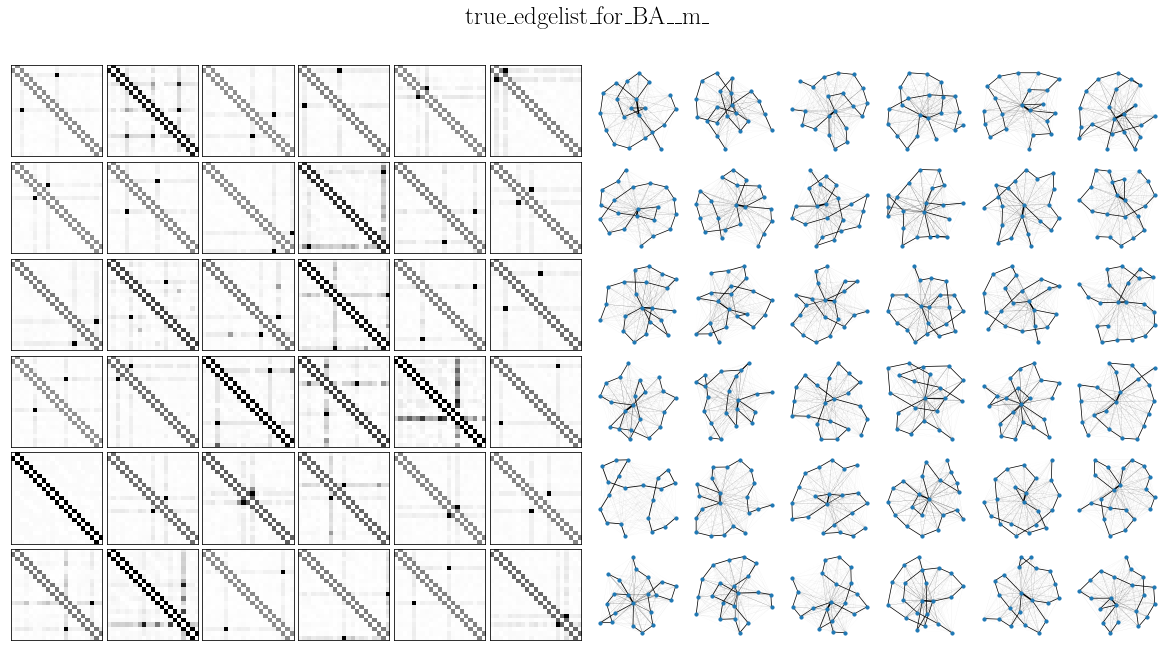

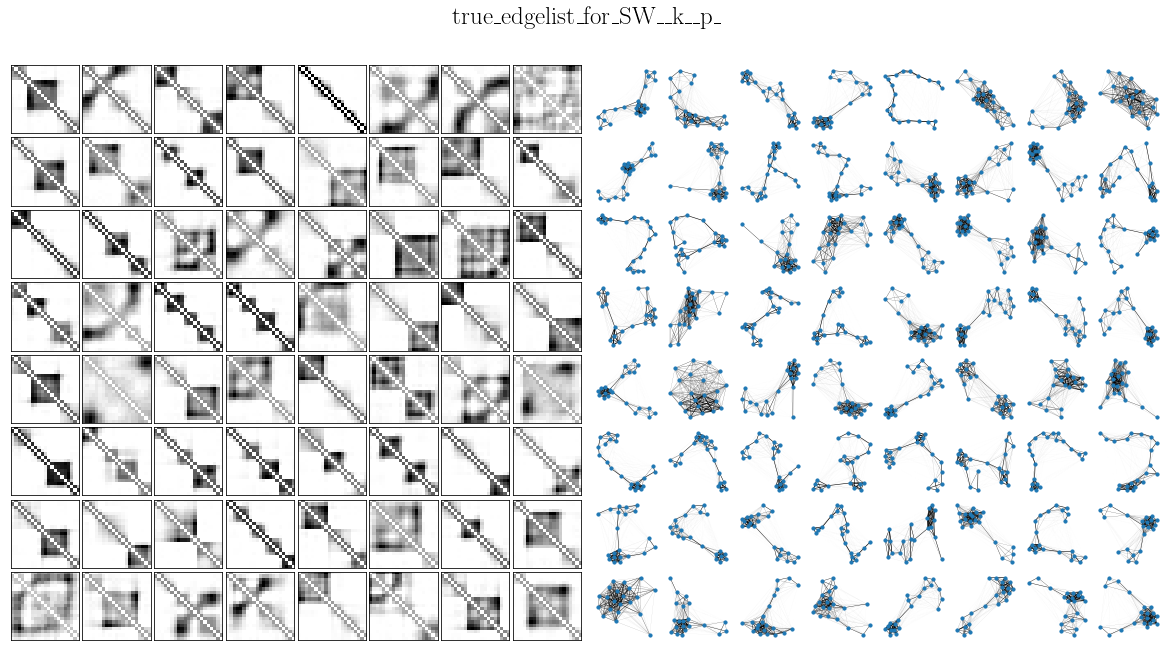

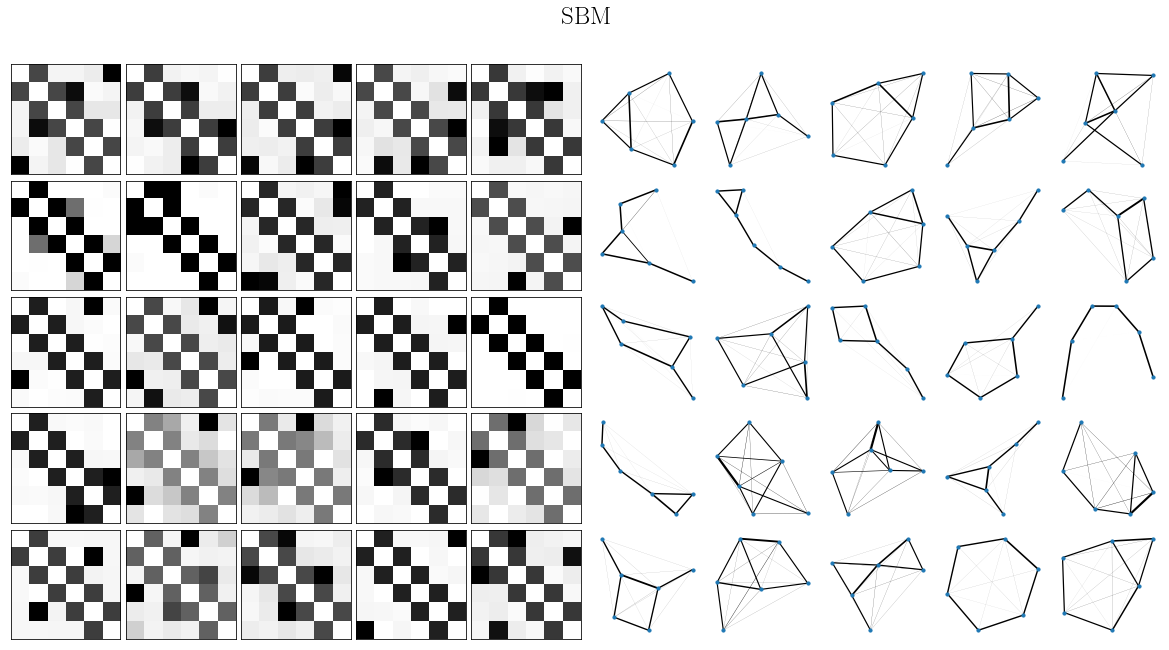

In [57]:
save_folder = "Network_dictionary/test1/"

for i in range(len(onlyfiles)):
    path = mypath + "/" + onlyfiles[i]
    result_dict = np.load(path, allow_pickle=True).item()
    ntwk_nonpy = onlyfiles[i].replace('.npy', "")
    ntwk = result_dict.get('Network name')
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    ntwk_nonumber = ntwk_nonumber.replace('.txt',"")
    print('ntwk_nonpy', ntwk_nonpy)
    
    W0 = result_dict.get("Dictionary learned")
    At0 = result_dict.get("Code COV learned")
    
    NDL1 = ndl.Network_Reconstructor(G=nn.NNetwork(),
                                 n_components=W0.shape[1],
                                 k2=result_dict.get("Motif size")
                                    )
    
    NDL1.W = result_dict.get("Dictionary learned")
    NDL1.At = result_dict.get("Code COV learned")
    

    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonpy + "_subgraphs_dict" + ".png"
    subtitle = 'induced subgraphs on {}-paths'.format(k)
    
    NDL1.display_dict_and_graph(title=title,
                                 save_path=save_path,
                                 grid_shape=None,
                                 fig_size=[20,10])



# Subgraphs & latent motifs community sizes box plot

In [63]:
list_network_files0 = [#'COVID_PPI.txt',
                      'facebook_combined.txt',
                      'arxiv.txt',
                      'node2vec_homosapiens_PPI.txt']

list_network_files1 = ['Caltech36.txt',
                      'MIT8.txt',
                      'UCLA26.txt',
                      'Harvard1.txt']


list_network_files2 = ['true_edgelist_for_ER_5000_mean_degree_50.txt',
                      'true_edgelist_for_ER_5000_mean_degree_100.txt']


list_network_files3 = ['true_edgelist_for_SW_5000_k_50_p_0.05.txt',
                      'true_edgelist_for_SW_5000_k_50_p_0.1.txt',
                      'true_edgelist_for_BA_5000_m_25.txt',
                      'true_edgelist_for_BA_5000_m_50.txt']

list_network_files4 = ['SBM1.txt']

ntwk_list = list_network_files0 + list_network_files1 + list_network_files2 + list_network_files3 + list_network_files4
    

## Get box plot from saved data

In [64]:
subgraphs_community_list0, latentmotifs_community_list0 = np.load("Network_dictionary/NDL_rev1/community_data.npy", allow_pickle=True)
subgraphs_community_list1, latentmotifs_community_list1 = np.load("Network_dictionary/NDL_rev1/community_data_synth.npy", allow_pickle=True)
subgraphs_community_list2, latentmotifs_community_list2 = np.load("Network_dictionary/NDL_rev1/community_data_SBM.npy", allow_pickle=True)
subgraphs_community_list3, latentmotifs_community_list3 = np.load("Network_dictionary/NDL_rev1/community_data_SBM2.npy", allow_pickle=True)

subgraphs_community_list = list(subgraphs_community_list0) + list(subgraphs_community_list1)+list(subgraphs_community_list2)+list(subgraphs_community_list3)
latentmotifs_community_list = list(latentmotifs_community_list0) + list(latentmotifs_community_list1)+list(latentmotifs_community_list2)+list(latentmotifs_community_list3)

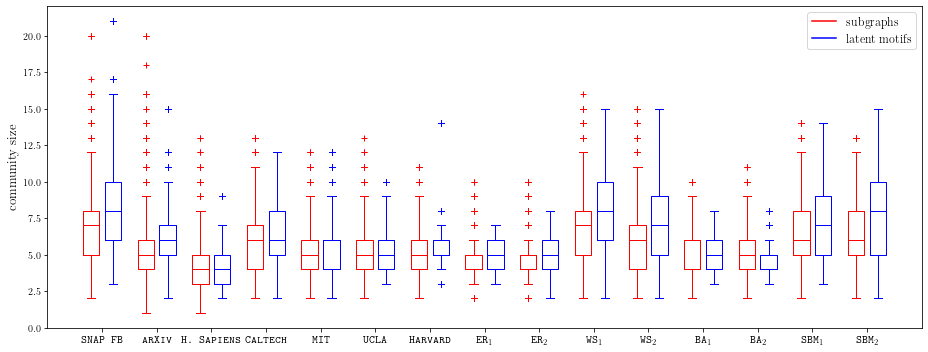

In [65]:
import matplotlib.pyplot as plt
import numpy as np

#data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
#data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

data_a = subgraphs_community_list
data_b = latentmotifs_community_list


ticks = ['$\\textsc{\\texttt{SNAP FB}}$',
                '$\\textsc{\\texttt{arXiv}}$',
                '$\\textsc{\\texttt{H. Sapiens}}$',
                '$\\textsc{\\texttt{Caltech}}$', 
                '$\\textsc{\\texttt{MIT}}$', 
                '$\\textsc{\\texttt{UCLA}}$', 
                '$\\textsc{\\texttt{Harvard}}$', 
                '$\\textsc{\\texttt{ER}}_{1}$', 
                '$\\textsc{\\texttt{ER}}_{2}$', 
                '$\\textsc{\\texttt{WS}}_{1}$',
                '$\\textsc{\\texttt{WS}}_{2}$',
                '$\\textsc{\\texttt{BA}}_{1}$',
                '$\\textsc{\\texttt{BA}}_{2}$',
                '$\\textsc{\\texttt{SBM}}_{1}$',
                '$\\textsc{\\texttt{SBM}}_{2}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=[13,5])

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='r+', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='b+', widths=0.6)
set_box_color(bpl, 'r') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'b')



# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='r', label='subgraphs')
plt.plot([], c='b', label='latent motifs')
plt.legend(fontsize=12)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=11.5)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 22)
plt.ylabel('community size', fontsize=13)
plt.tight_layout()
plt.savefig('boxcompare.pdf')

## Compute subgraph community stats from scratch

In [66]:
from helper_functions.helper_functions import compute_community_stats

subgraphs_community_list, latentmotifs_community_list = compute_community_stats(ntwk_list, 
                                                                                k=10, 
                                                                                num_subgraphs=50,
                                                                                save_path="Network_dictionary/test1/community_data_COVID")

  0%|                                                    | 0/14 [00:00<?, ?it/s]

network=facebook_combined.txt, k=10
ntwk=facebook_combined.txt. num_nodes=4039, num_edges=176468



 30%|█████████████▏                              | 3/10 [00:00<00:00, 20.75it/s]

num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50



 60%|██████████████████████████▍                 | 6/10 [00:00<00:00, 18.93it/s]

num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50



100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 11.55it/s]


num of subgraphs induced on k-paths: 50
num of subgraphs induced on k-paths: 50
X.shape (100, 500)



100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 1908.76it/s]


mean community size=1.3333333333333333, std=0.6992058987801011



  7%|███▏                                        | 1/14 [00:01<00:15,  1.21s/it]

mean community size=3.048435001142335, std=0.9571266042047635
network=arxiv.txt, k=10
ntwk=arxiv.txt. num_nodes=18772, num_edges=396160



  0%|                                                    | 0/10 [00:00<?, ?it/s]

num of subgraphs induced on k-paths: 50


num of subgraphs induced on k-paths: 50


 30%|█████████████▏                              | 3/10 [00:00<00:00,  7.35it/s]

num of subgraphs induced on k-paths: 50


  7%|███▏                                        | 1/14 [00:04<00:53,  4.14s/it]


KeyboardInterrupt: 